# 电路和门

## 概述

在 TyxonQ 中，$n$ 量子比特上的量子电路——通过蒙特卡洛轨迹方法支持无噪声和有噪声的模拟——由“tq.Circuit(n)”API 创建。
在这里，我们展示了如何创建基本电路，对它们应用门，并计算各种输出。

## 设置

In [6]:
import inspect
import numpy as np
import tyxonq as tq

在 TyxonQ 中，默认的运行时数据类型是 complex64，但如果需要更高的精度，可以按照如下设置

In [6]:
tq.set_dtype("complex128")

('complex128', 'float64')

## 基本电路和输出

量子电路按照可以如下构造。

In [7]:
c = tq.Circuit(2)
c.h(0)
c.cnot(0, 1)
c.rx(1, theta=0.2)

**输出：量子态**

由此，可以计算各种输出。

完整的波函数可以通过


In [8]:
c.state()

array([0.70357419+0.j        , 0.        -0.07059289j,
       0.        -0.07059289j, 0.70357419+0.j        ])

全波函数也可用于生成部分比特上的约化密度矩阵


In [10]:
# 量子位 1 的约化密度矩阵
s = c.state()
tq.quantum.reduced_density_matrix(s, cut=[0])  # cut：要追踪的量子位索引列表

array([[0.5+0.00000000e+00j, 0. +2.41404955e-19j],
       [0. -2.41404955e-19j, 0.5+0.00000000e+00j]])

通过将相应的位串值传递给 ``amplitude(振幅)`` 函数来计算单个基向量的振幅。例如，$\vert{10}\rangle$ 基向量的振幅由下式计算

In [11]:
c.amplitude("10")

array(0.-0.07059289j)

也可以输出对应整个量子电路的幺正矩阵。

In [12]:
c.matrix()

array([[ 0.70357419+0.j        ,  0.        -0.07059289j,
         0.70357419+0.j        ,  0.        -0.07059289j],
       [ 0.        -0.07059289j,  0.70357419+0.j        ,
         0.        -0.07059289j,  0.70357419+0.j        ],
       [ 0.        -0.07059289j,  0.70357419+0.j        ,
         0.        +0.07059289j, -0.70357419+0.j        ],
       [ 0.70357419+0.j        ,  0.        -0.07059289j,
        -0.70357419+0.j        ,  0.        +0.07059289j]])

**输出：测量**

可以使用以下 API 生成与所有 qubits 上的 $Z$-measurements 相对应的随机样本，
该 API 将输出一个 $(\text{bitstring}, \text{probability})$ 元组，包括与测量结果对应的二进制字符串
对所有量子比特的 Z 测量以及获得该结果的相关概率。可以使用“measure”命令对量子比特子集执行 Z 测量

In [14]:
c.sample()

(array([1., 1.]), np.float64(0.4950166444603104))

In [16]:
c.measure(0, with_prob=True)

(array([1.]), np.float64(0.5))

In [18]:
c.measure(0, 1, with_prob=True)

(array([1., 1.]), np.float64(0.4950166444603104))

**输出：期望**
    
期望值，例如 $\langle X_0 \rangle$、$\langle X_1 + Z_1\rangle$ 或 $\langle Z_0 Z_1\rangle$ 可以通过电路对象的 ${\sf expectation}$ 方法计算

In [20]:
print(c.expectation([tq.gates.x(), [0]]))  # <X0>
print(c.expectation([tq.gates.x() + tq.gates.z(), [1]]))  # <X1 + Z1>
print(c.expectation([tq.gates.z(), [0]], [tq.gates.z(), [1]]))  # <Z0 Z1>

0j
0j
(0.9800665778412415+0j)


In [23]:
# 用户定义运算符

c.expectation([np.array([[3, 2], [2, -3]]), [0]])

array(0.+0.j)

而泡利字符串的期望，例如 $\langle Z_0 X_1\rangle$ 可以使用上面的 c.expectation 计算，TyxonQ 提供了另一种计算此类表达式的方法，
这对于更长的 Pauli 字符串可能更方便，更长的 Pauli 字符串可以类似地通过提供与 $X,Y,Z$ 运算符作用的量子比特相对应的索引列表计算得到。

In [24]:
c.expectation_ps(x=[1], z=[0])

array(0.-5.94767735e-18j)

## 内置门

TyxonQ 为各种常见的量子门提供支持。完整列表如下。

In [25]:
for g in tq.Circuit.sgates:
    gf = getattr(tq.gates, g)
    print(g)
    print(tq.gates.matrix_for_gate(gf()))

i
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
x
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
y
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]
z
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]
h
[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]
t
[[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j]]
s
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+1.j]]
td
[[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.70710677-0.70710677j]]
sd
[[1.+0.j 0.+0.j]
 [0.+0.j 0.-1.j]]
wroot
[[ 0.70710678+0.j  -0.5       -0.5j]
 [ 0.5       -0.5j  0.70710678+0.j ]]
cnot
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]
cz
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]
swap
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
cy
[[1.+0.j 

In [26]:
for g in tq.Circuit.vgates:
    print(g, inspect.signature(getattr(tq.gates, g).f))

r (theta: float = 0, alpha: float = 0, phi: float = 0) -> tyxonq.gates.Gate
cr (theta: float = 0, alpha: float = 0, phi: float = 0) -> tyxonq.gates.Gate
u (theta: float = 0, phi: float = 0, lbd: float = 0) -> tyxonq.gates.Gate
cu (*args: Any, **kws: Any) -> Any
rx (theta: float = 0) -> tyxonq.gates.Gate
ry (theta: float = 0) -> tyxonq.gates.Gate
rz (theta: float = 0) -> tyxonq.gates.Gate
phase (theta: float = 0) -> tyxonq.gates.Gate
rxx (*, unitary: Any = array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]]), theta: float, half: bool = True, name: str = 'none') -> tyxonq.gates.Gate
ryy (*, unitary: Any = array([[ 0.+0.j,  0.-0.j,  0.-0.j, -1.+0.j],
       [ 0.+0.j,  0.+0.j,  1.-0.j,  0.-0.j],
       [ 0.+0.j,  1.-0.j,  0.+0.j,  0.-0.j],
       [-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]]), theta: float, half: bool = True, name: str = 'none') -> tyxonq.gates.Gate
rzz (*, unitary: Any = array([[ 1.,  0.,  0.,  0.],
       [ 0., -1.,  0., -0.],
    

此外，我们有如下内置矩阵

In [27]:
for name in dir(tq.gates):
    if name.endswith("_matrix"):
        print(name, ":\n", getattr(tq.gates, name))

_cnot_matrix :
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
_cy_matrix :
 [[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -0.-1.j]
 [ 0.+0.j  0.+0.j  0.+1.j  0.+0.j]]
_cz_matrix :
 [[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]
_fredkin_matrix :
 [[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]
_h_matrix :
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
_i_matrix :
 [[1. 0.]
 [0. 1.]]
_ii_matrix :
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
_ix_matrix :
 [[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
_iy_matrix :
 [[0.+0.j 0.-1.j 0.+0.j 0.-0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.-0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j]]
_iz_matrix :
 [[ 1.  0.  0.  0.]
 [ 0. -1.  0. -0.]


**任意幺正** 用户定义的幺正门可以通过将其矩阵元素指定为数组来实现。例如，S 量子门 $S = \begin{pmatrix} 1 & 0 \\ 0 & i\end{pmatrix}$ -- 也可以通过调用 ``c.s()``
直接添加可以实现为

In [28]:
c.unitary(0, unitary=np.array([[1, 0], [0, 1j]]), name="S")

# 可选的名称参数指定当电路输出到 \LaTeX 时如何显示此门

**指数门。** 形式为 $e^{i\theta G}$ 的门，其中矩阵 $G$ 满足 $G^2 = I$ 允许通过 ``exp1`` 命令快速实现，例如， 双比特门 $e^{i\theta Z\otimes Z}$ 作用于量子比特 $0$ 和 $1$

In [29]:
c.exp1(0, 1, theta=0.2, unitary=tq.gates._zz_matrix)

一般指数门，其中 $G^2\neq 1$ 可以通过 ``exp`` 命令实现：

In [30]:
c.exp(0, theta=0.2, unitary=np.array([[2, 0], [0, 1]]))

**非幺正门。**
TyxonQ 还支持非幺正门的应用，或者通过提供一个非幺正矩阵作为“c.unitary”的参数，或者通过提供一个复角 $\theta$ 给指数门。

In [31]:
c.unitary(0, unitary=np.array([[1, 2], [2, 3]]), name="non_unitary")
c.exp1(0, theta=0.2 + 1j, unitary=tq.gates._x_matrix)

请注意，非幺正门将导致不再归一化的输出状态，因为归一化通常是不必要的并且需要额外的时间，这是可以避免的。

## 指定输入状态和拼接电路

默认情况下，量子电路应用于初始全零乘积状态。 可以通过将包含输入状态幅度的数组传递给“tq.Circuit”的可选“inputs”参数来设置任意初始状态。
例如，最大纠缠态 $\frac{\vert{00}\rangle+\vert{11}\rangle}{\sqrt{2}}$ 可以如下输入。

In [32]:
c1 = tq.Circuit(2, inputs=np.array([1, 0, 0, 1] / np.sqrt(2)))

作用于相同数量的量子比特的电路可以通过“c.append()”或“c.prepend()”命令组合在一起。
通过上面定义的“c1”，我们可以创建一个新的电路“c2”，然后将它们组合在一起：

In [33]:
c2 = tq.Circuit(2)
c2.cnot(1, 0)

c3 = c1.append(c2)
c3.state()

array([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j, 0.        +0.j])

## 电路变换和可视化

``tq.Circuit`` 对象可以与 Qiskit ``QuantumCircuit`` 对象相互转换。

In [35]:
c = tq.Circuit(2)
c.H(0)
c.cnot(1, 0)
cq = c.to_qiskit()

In [36]:
c1 = tq.Circuit.from_qiskit(cq)

In [37]:
# 打印量子电路中间表示

c1.to_qir()

[{'gatef': h,
  'gate': Gate(
      name: 'h',
      tensor:
          array([[ 0.70710678+0.j,  0.70710678+0.j],
                 [ 0.70710678+0.j, -0.70710678+0.j]]),
      edges: [
          Edge('cnot'[3] -> 'h'[0] ),
          Edge('h'[1] -> 'qb-0'[0] )
      ]),
  'index': (0,),
  'name': 'h',
  'split': None,
  'mpo': False},
 {'gatef': cnot,
  'gate': Gate(
      name: 'cnot',
      tensor:
          array([[[[1.+0.j, 0.+0.j],
                   [0.+0.j, 0.+0.j]],
          
                  [[0.+0.j, 1.+0.j],
                   [0.+0.j, 0.+0.j]]],
          
          
                 [[[0.+0.j, 0.+0.j],
                   [0.+0.j, 1.+0.j]],
          
                  [[0.+0.j, 0.+0.j],
                   [1.+0.j, 0.+0.j]]]]),
      edges: [
          Edge(Dangling Edge)[0],
          Edge(Dangling Edge)[1],
          Edge('cnot'[2] -> 'qb-1'[0] ),
          Edge('cnot'[3] -> 'h'[0] )
      ]),
  'index': (1, 0),
  'name': 'cnot',
  'split': None,
  'mpo': False}]

有两种方法可以可视化 TyxonQ 中生成的量子电路。 第一种是使用 ``c.tex()`` 来获取 \Latex quantikz 命令。

In [38]:
c.tex()

'\\begin{quantikz}\n\\lstick{$\\ket{0}$}&\\gate{h} &\\targ{} &\\qw \\\\\n\\lstick{$\\ket{0}$}&\\qw &\\ctrl{-1} &\\qw \n\\end{quantikz}'

第二种方法使用 [qiskit](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.draw.html) 中的绘图功能。

In [41]:
import qiskit

In [42]:
qiskit.__version__

'2.1.1'

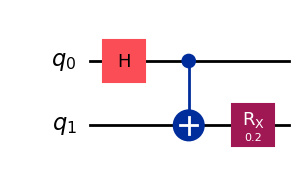

In [8]:
c.draw(output="mpl")